In [1]:
import copy
import numpy as np
from sklearn import preprocessing
import h5py
import sklearn.svm
import random
import math
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as mt

In [2]:
class Layer:
    # constructor
    def __init__(self, neurons=0, theta=[], b=[], z=[], a=[],delta=[],DELTA_THETA=[],DELTA_BIAS=[],dTheta=[],dBias=[]):
        self.neurons = 0 # neurons count in layer
        self.theta = [] # Weight vector(W)
        self.b=[] # bias
        self.z = [] # hypothesis z = W.T * X + b = here = theta.T * X + b
        self.a = [] # activation function a=sigmoid(z) or relu(z) or anyother(z)
        self.delta = [] # Loss or Error function delta= delta_cross_entropy() or anyother()
        self.DELTA_THETA = [] # only derivative weight vector =dw
        self.DELTA_BIAS = [] # only derivative bias vector =db
        self.dTheta = [] # complete derivation term = (1/m)*(DELTA + (lambda*theta))
        self.dBias = [] # complete derivation term 

    def setNeurons(self, neurons):
        self.neurons = neurons

    def getNeurons(self):
        return self.neurons

    def setTheta(self, theta):
        self.theta = theta

    def getTheta(self):
        return self.theta

    def setB(self, b):
        self.b = b

    def getB(self):
        return self.b

    def setZ(self, z):
        self.z = z

    def getZ(self):
        return self.z

    def setA(self, a):
        self.a = a

    def getA(self):
        return self.a

    def setDelta(self, delta):
        self.delta = delta

    def getDelta(self):
        return self.delta

    def setDELTA_THETA(self, DELTA_THETA):
        self.DELTA_THETA = DELTA_THETA

    def getDELTA_THETA(self):
        return self.DELTA_THETA

    def setDELTA_BIAS(self, DELTA_BIAS):
        self.DELTA_BIAS = DELTA_BIAS

    def getDELTA_BIAS(self):
        return self.DELTA_BIAS
    
    def setDTheta(self, dTheta):
        self.dTheta = dTheta

    def getDTheta(self):
        return self.dTheta
    
    def setDBias(self, dBias):
        self.dBias = dBias

    def getDBias(self):
        return self.dBias
    
    

In [3]:
dataset = h5py.File('../MNIST_Subset.h5', 'r')

print(list(dataset.keys()))

['X', 'Y']


In [4]:
data_X = dataset['X']
data_Y = dataset['Y']

X = np.array(data_X.value)
Y = np.array(data_Y.value)

print(X.shape,Y.shape)

# Y=Y.reshape(14251,1)
print(X.shape,Y.shape)

print(X.shape)
X=X.reshape(14251,28*28)
print(X.shape)

X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2,random_state=20)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

X=X_train #X= X_train
Y=Y_train #Y=Y_train

X = preprocessing.scale(X)
X_test=preprocessing.scale(X_test)

m=X.shape[0]
print('no.of samples:',m)

X=X.T # transposed X now shape=784 x 14251 => now each column is one datapoint
X_test=X_test.T
print(X.shape)

(14251, 28, 28) (14251,)
(14251, 28, 28) (14251,)
(14251, 28, 28)
(14251, 784)
(11400, 784) (2851, 784) (11400,) (2851,)
no.of samples: 11400
(784, 11400)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [5]:
def sigmoid(z):
    return (1.0/(1.0+np.exp(-z)))

In [6]:
def softmax(z):
#     return np.exp(z)/np.sum(np.exp(z),axis=0)
    return np.nan_to_num(np.divide(np.exp(z),np.sum(np.exp(z),axis=0)))

In [7]:
def stableSoftmax(z):
    exps = np.exp(z - np.max(z))
    return np.divide(exps , np.sum(exps,axis=0))

In [8]:
def delta_cross_entropy(z,y):
    grad = (z-y)/m
    return grad

In [9]:
def crossEntropy(a,y):
    return (-y*np.log(a))/m

In [10]:
def accuracy(y_predicted):
    y_multilabel = []
    for p in y_predicted:
        y_multilabel.append(list(p).index(max(p)))
    
    plot_accuracy.append(accuracy_score(y_multilabel, Y))
    print(accuracy_score(y_multilabel, Y))
    
def accuracy_test(y_predicted):
    y_multilabel = []
    for p in y_predicted:
        y_multilabel.append(list(p).index(max(p)))
        
    print(accuracy_score(y_multilabel, Y_test))

In [11]:
def relu(d):
    ans = np.maximum(d,0)
    return ans

In [12]:
y_actual=[] # changed to 1 at their index

for i in range(Y.shape[0]):
    temp = [0]*10
    index = int(Y[i])
    temp[index] = 1
    y_actual.append(temp)
y_actual=np.array(y_actual).T


In [13]:
l=5
neurons=[784,100,50,50,10]

# l=3
# neurons=[784,100,10]

layers=[]
for i in range(len(neurons)):
    lay=Layer()
    
    if(i!=len(neurons)-1):
        DELTA_THETA=np.zeros((neurons[i+1],neurons[i]))
        theta=np.random.uniform(low=0.1,high=1,size=(neurons[i],neurons[i+1]))/math.sqrt(neurons[i])
        #DELTA_BIAS=
        #bias=
        
        lay.setDELTA_THETA(DELTA_THETA)
        lay.setTheta(theta)
    layers.append(lay)

    
plot_accuracy=[]
layers[0].setA(X)
regParam=1
alpha=0.01
maxIterations=500
for iter in range(maxIterations):
    
    # Forward propagation
    for i in range(1,l):
        z=np.dot(layers[i-1].getTheta().T, layers[i-1].getA())
        if(i==l-1):
#             a=stableSoftmax(z)
            a=softmax(z)
        else:
            a=relu(z)
        layers[i].setZ(z)
        layers[i].setA(a)
    
    # Backward Propagation
    for i in range(l-1,-1,-1):
        loss=None
        if(i==l-1):
            loss=delta_cross_entropy(layers[i].getA(),y_actual)
        else:
            deriv=(layers[i].getA() > 0).astype(int)
            
            loss=np.dot(layers[i].getTheta(),layers[i+1].getDelta()) * (deriv)
        
        layers[i].setDelta(loss)
    
    for i in range(0,l-1):
        D=layers[i].getDELTA_THETA() + np.dot(layers[i+1].getDelta(),layers[i].getA().T)
        layers[i].setDELTA_THETA(D)
    
    for i in range(0,l-1):
        dT=(1/m)*(layers[i].getDELTA_THETA().T+(regParam*layers[i].getTheta()))
        layers[i].setDTheta(dT)
    
    print('Iteration:',iter,'--> ',end='')
    accuracy(layers[-1].getA().T)
    if(accuracy(layers[-1].getA().T) == np.nan):
        break
    
    for i in range(0,l-1):
        newTh=layers[i].getTheta()-(alpha*layers[i].getDTheta())
        layers[i].setTheta(newTh)


Iteration: 0 --> 0.0
0.0
Iteration: 1 --> 0.0
0.0
Iteration: 2 --> 0.0
0.0
Iteration: 3 --> 0.0
0.0
Iteration: 4 --> 0.0
0.0
Iteration: 5 --> 0.0
0.0
Iteration: 6 --> 0.0
0.0
Iteration: 7 --> 0.0
0.0
Iteration: 8 --> 0.0
0.0
Iteration: 9 --> 0.0
0.0
Iteration: 10 --> 0.0
0.0
Iteration: 11 --> 0.0
0.0
Iteration: 12 --> 0.0012280701754385965
0.0012280701754385965
Iteration: 13 --> 0.0036842105263157894
0.0036842105263157894
Iteration: 14 --> 0.025526315789473685
0.025526315789473685
Iteration: 15 --> 0.24868421052631579
0.24868421052631579


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Iteration: 16 --> 0.2537719298245614
0.2537719298245614
Iteration: 17 --> 0.25473684210526315
0.25473684210526315
Iteration: 18 --> 0.25473684210526315
0.25473684210526315
Iteration: 19 --> 0.25473684210526315
0.25473684210526315
Iteration: 20 --> 0.25473684210526315
0.25473684210526315
Iteration: 21 --> 0.25473684210526315
0.25473684210526315
Iteration: 22 --> 0.25473684210526315
0.25473684210526315
Iteration: 23 --> 0.25473684210526315
0.25473684210526315
Iteration: 24 --> 0.25473684210526315
0.25473684210526315
Iteration: 25 --> 0.25473684210526315
0.25473684210526315
Iteration: 26 --> 0.25473684210526315
0.25473684210526315
Iteration: 27 --> 0.25473684210526315
0.25473684210526315
Iteration: 28 --> 0.25473684210526315
0.25473684210526315
Iteration: 29 --> 0.25473684210526315
0.25473684210526315
Iteration: 30 --> 0.25473684210526315
0.25473684210526315
Iteration: 31 --> 0.25473684210526315
0.25473684210526315
Iteration: 32 --> 0.25473684210526315
0.25473684210526315
Iteration: 33 --

Iteration: 161 --> 0.2513157894736842
0.2513157894736842
Iteration: 162 --> 0.2513157894736842
0.2513157894736842
Iteration: 163 --> 0.2512280701754386
0.2512280701754386
Iteration: 164 --> 0.2512280701754386
0.2512280701754386
Iteration: 165 --> 0.2512280701754386
0.2512280701754386
Iteration: 166 --> 0.2512280701754386
0.2512280701754386
Iteration: 167 --> 0.2512280701754386
0.2512280701754386
Iteration: 168 --> 0.2512280701754386
0.2512280701754386
Iteration: 169 --> 0.2512280701754386
0.2512280701754386
Iteration: 170 --> 0.2512280701754386
0.2512280701754386
Iteration: 171 --> 0.251140350877193
0.251140350877193
Iteration: 172 --> 0.2509649122807018
0.2509649122807018
Iteration: 173 --> 0.25166666666666665
0.25166666666666665
Iteration: 174 --> 0.24754385964912282
0.24754385964912282
Iteration: 175 --> 0.24578947368421053
0.24578947368421053
Iteration: 176 --> 0.24587719298245614
0.24587719298245614
Iteration: 177 --> 0.24578947368421053
0.24578947368421053
Iteration: 178 --> 0.24

Iteration: 303 --> 0.24008771929824563
0.24008771929824563
Iteration: 304 --> 0.24
0.24
Iteration: 305 --> 0.23982456140350877
0.23982456140350877
Iteration: 306 --> 0.23964912280701756
0.23964912280701756
Iteration: 307 --> 0.23956140350877192
0.23956140350877192
Iteration: 308 --> 0.23964912280701756
0.23964912280701756
Iteration: 309 --> 0.23964912280701756
0.23964912280701756
Iteration: 310 --> 0.23956140350877192
0.23956140350877192
Iteration: 311 --> 0.2394736842105263
0.2394736842105263
Iteration: 312 --> 0.24026315789473685
0.24026315789473685
Iteration: 313 --> 0.2393859649122807
0.2393859649122807
Iteration: 314 --> 0.23105263157894737
0.23105263157894737
Iteration: 315 --> 0.2305263157894737
0.2305263157894737
Iteration: 316 --> 0.23043859649122808
0.23043859649122808
Iteration: 317 --> 0.23026315789473684
0.23026315789473684
Iteration: 318 --> 0.23
0.23
Iteration: 319 --> 0.22982456140350876
0.22982456140350876
Iteration: 320 --> 0.22921052631578948
0.22921052631578948
Iter

Iteration: 446 --> 0.19482456140350876
0.19482456140350876
Iteration: 447 --> 0.19456140350877194
0.19456140350877194
Iteration: 448 --> 0.19421052631578947
0.19421052631578947
Iteration: 449 --> 0.19342105263157894
0.19342105263157894
Iteration: 450 --> 0.19263157894736843
0.19263157894736843
Iteration: 451 --> 0.19201754385964911
0.19201754385964911
Iteration: 452 --> 0.19149122807017543
0.19149122807017543
Iteration: 453 --> 0.1907017543859649
0.1907017543859649
Iteration: 454 --> 0.19017543859649122
0.19017543859649122
Iteration: 455 --> 0.18964912280701754
0.18964912280701754
Iteration: 456 --> 0.1886842105263158
0.1886842105263158
Iteration: 457 --> 0.1880701754385965
0.1880701754385965
Iteration: 458 --> 0.18745614035087718
0.18745614035087718
Iteration: 459 --> 0.18666666666666668
0.18666666666666668
Iteration: 460 --> 0.18587719298245614
0.18587719298245614
Iteration: 461 --> 0.1856140350877193
0.1856140350877193
Iteration: 462 --> 0.18570175438596492
0.18570175438596492
Itera

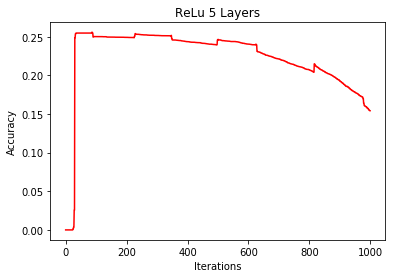

In [14]:
mt.figure('ReLu 5 Layers')
mt.plot(range(len(plot_accuracy)), plot_accuracy, 'r', label='alpha=0.01')

mt.xlabel('Iterations')
mt.ylabel('Accuracy')
mt.title('ReLu 5 Layers')
mt.axis('tight')
mt.show()

In [17]:
layers_test=[]
for i in range(len(neurons)):
    lay=Layer()
    
    if(i!=len(neurons)-1):
        theta=layers[i].getTheta()
        lay.setTheta(theta)
    layers_test.append(lay)
    
layers_test[0].setA(X_test)
# Forward propagation
for i in range(1,l):
    z=np.dot(layers_test[i-1].getTheta().T, layers_test[i-1].getA())
    if(i==l-1):
        a=softmax(z)
    else:
        a=relu(z)
        
    layers_test[i].setZ(z)
    layers_test[i].setA(a)

accuracy_test(layers_test[-1].getA().T)

0.1648544370396352


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
for i in range(len(neurons)-1):
    print(layers[i].getTheta())
    

[[0.02613783 0.02816276 0.01925721 ... 0.02398839 0.02968486 0.02528809]
 [0.01080781 0.0235358  0.02088943 ... 0.01470684 0.02546881 0.01852334]
 [0.00420772 0.0205155  0.03494777 ... 0.0090195  0.02489782 0.01491589]
 ...
 [0.0311151  0.00970498 0.0037184  ... 0.01007797 0.00822105 0.03458936]
 [0.00797099 0.01638859 0.02716629 ... 0.02949016 0.02076829 0.00447526]
 [0.00978722 0.02528197 0.02179508 ... 0.03362792 0.03389292 0.03463655]]
[[0.08175    0.10157316 0.03229751 ... 0.07859974 0.05093541 0.02560633]
 [0.09107741 0.02021749 0.06045661 ... 0.03801778 0.04430896 0.08519915]
 [0.05593421 0.10487459 0.05458803 ... 0.04291952 0.0241656  0.09654703]
 ...
 [0.03174154 0.05439225 0.07683649 ... 0.0556383  0.02344374 0.04113803]
 [0.04817429 0.09927146 0.05346902 ... 0.02538095 0.02218052 0.09914143]
 [0.10046331 0.05113864 0.09669235 ... 0.06851083 0.10559229 0.04834869]]
[[0.1506562  0.13371198 0.07233445 ... 0.12385581 0.10126797 0.04422947]
 [0.11991578 0.13764785 0.09110403 ... 